# 3)Number Recognition:

Handwritten digit recognition system not only detects scanned images of handwritten digits.
Handwritten digit recognition using MNIST dataset is a major project made with the help of Neural Network. 
It basically detects the scanned images of handwritten digits.

# Importing Libraries:

In [2]:
!pip install keras
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata (4.8 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Chiluca Shiva Kumar\\anaconda3\\Lib\\site-packages\\google\\_upb\\_message.pyd'
Consider using the `--user` option or check the permissions.




   ----- --------------------------------- 40.9/284.2 MB 149.2 kB/s eta 0:27:11
   ----- --------------------------------- 40.9/284.2 MB 149.2 kB/s eta 0:27:11
   ----- --------------------------------- 40.9/284.2 MB 149.2 kB/s eta 0:27:11
   ----- --------------------------------- 40.9/284.2 MB 149.2 kB/s eta 0:27:11
   ----- --------------------------------- 40.9/284.2 MB 149.2 kB/s eta 0:27:11
   ----- --------------------------------- 40.9/284.2 MB 149.2 kB/s eta 0:27:11
   ----- --------------------------------- 40.9/284.2 MB 149.2 kB/s eta 0:27:11
   ----- --------------------------------- 40.9/284.2 MB 145.1 kB/s eta 0:27:57
   ----- --------------------------------- 40.9/284.2 MB 145.1 kB/s eta 0:27:57
   ----- --------------------------------- 40.9/284.2 MB 145.1 kB/s eta 0:27:57
   ----- --------------------------------- 40.9/284.2 MB 145.1 kB/s eta 0:27:57
   ----- --------------------------------- 40.9/284.2 MB 145.1 kB/s eta 0:27:57
   ----- ------------------------------

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
np.random.seed(0)

# Loading and Exploring MNIST Dataset:

In [4]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

# shape of the training and testing datasets:

In [5]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Data Visualization and Displaying Samples:

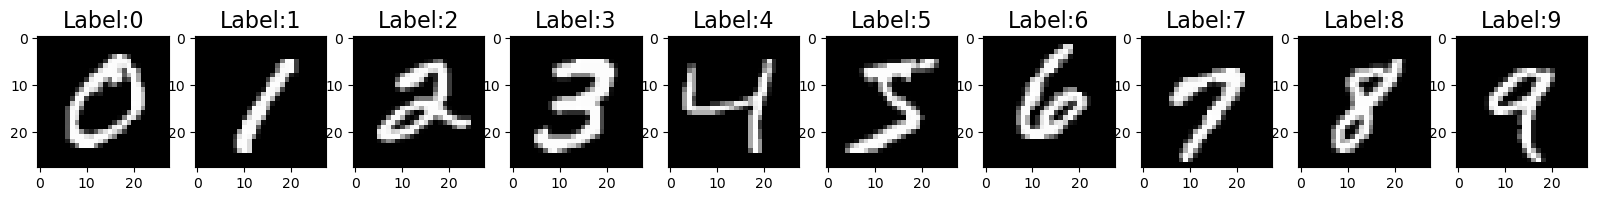

In [6]:
num_classes = 10
f,ax = plt.subplots(1,num_classes,figsize = (20,20))

for i in range(0,num_classes):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample,cmap = 'gray')
  ax[i].set_title("Label:{}".format(i),fontsize=16)

In [7]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


# One-Hot Encoding Labels:

In [8]:
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [9]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Data Normalization:

In [10]:
#normalize data
X_train = X_train/255
X_test = X_test/255

# Data Reshaping:

In [11]:
#reshape data
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# Building the Neural Network Model and Compiling the Model:

In [12]:
model = Sequential()

model.add(Dense(units = 128,input_shape = (784,),activation = 'relu'))
model.add(Dense(units = 128,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training the Model:

In [13]:
batch_size = 512
epochs = 10
model.fit(x = X_train,y = y_train,batch_size = batch_size,epochs = epochs)

Epoch 1/10
118/118 [==============================] - 5s 10ms/step - loss: 0.5964 - accuracy: 0.8260
Epoch 2/10
118/118 [==============================] - 1s 8ms/step - loss: 0.2286 - accuracy: 0.9329
Epoch 3/10
118/118 [==============================] - 1s 8ms/step - loss: 0.1672 - accuracy: 0.9508
Epoch 4/10
118/118 [==============================] - 1s 7ms/step - loss: 0.1336 - accuracy: 0.9611
Epoch 5/10
118/118 [==============================] - 1s 7ms/step - loss: 0.1124 - accuracy: 0.9666
Epoch 6/10
118/118 [==============================] - 1s 8ms/step - loss: 0.0930 - accuracy: 0.9728
Epoch 7/10
118/118 [==============================] - 1s 8ms/step - loss: 0.0825 - accuracy: 0.9752
Epoch 8/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0725 - accuracy: 0.9785
Epoch 9/10
118/118 [==============================] - 1s 8ms/step - loss: 0.0624 - accuracy: 0.9814
Epoch 10/10
118/118 [==============================] - 1s 8ms/step - loss: 0.0567 - accuracy: 0.982

# Evaluating the Model:

In [14]:
test_loss,test_acc = model.evaluate(X_test,y_test)
print("Test Loss: {},Test Accuracy: {}".format(test_loss,test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0752 - accuracy: 0.9768
Test Loss: 0.07521902769804001,Test Accuracy: 0.9768000245094299


# Predictions:

In [15]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis = 1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 1ms/step
[[4.94125288e-07 1.04898629e-06 4.64671430e-05 ... 9.99812663e-01
  5.21372749e-06 5.54553981e-06]
 [1.09834595e-07 6.94981602e-04 9.99284804e-01 ... 3.80314674e-07
  2.48139315e-07 5.13275707e-11]
 [3.94976041e-07 9.98801351e-01 6.91091045e-05 ... 2.84689973e-04
  3.68508452e-04 3.69212830e-06]
 ...
 [1.03807421e-10 7.66467056e-10 1.29708999e-09 ... 7.75672390e-07
  5.73554132e-07 1.58979947e-05]
 [2.41304985e-08 2.28204264e-08 2.26954033e-09 ... 1.94360816e-09
  6.97416908e-05 1.21382060e-08]
 [1.22374104e-07 2.11361524e-08 8.31759728e-09 ... 4.11846902e-12
  1.28070647e-08 5.79803927e-10]]
[7 2 1 ... 4 5 6]


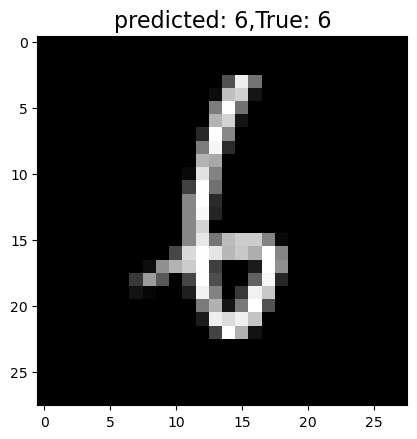

In [16]:
#single example
random_idx = np.random.choice(len(X_test))
X_sample = X_test[random_idx]
y_true = np.argmax(y_test,axis = 1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("predicted: {},True: {}".format(y_sample_pred_class,y_sample_true),fontsize = 16)
plt.imshow(X_sample.reshape(28,28),cmap = 'gray')

# Confusion Matrix:

Text(0.5, 1.0, 'confusion_matrix')

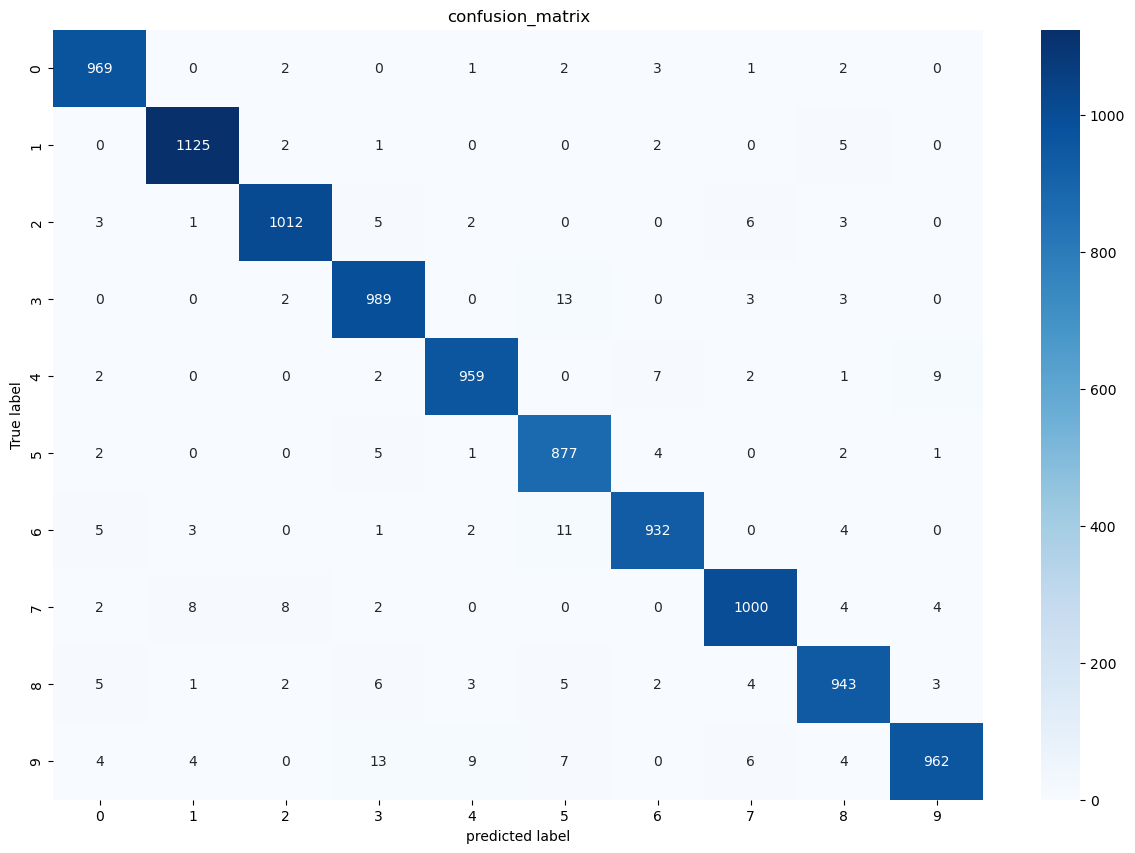

In [17]:
confusion_matrix = confusion_matrix(y_true,y_pred_classes)

#plot
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(confusion_matrix,annot = True,fmt = 'd',ax = ax,cmap = 'Blues')
ax.set_xlabel('predicted label')
ax.set_ylabel('True label')
ax.set_title('confusion_matrix')

# Error Analysis:

In [18]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
X_test_errors = X_test[errors]

In [19]:
y_pred_errors_probability = np.max(y_pred_errors,axis = 1)
true_probability_errors = np.diagonal(np.take(y_pred_errors,y_true_errors,axis = 1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

#get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] #5 lost ones

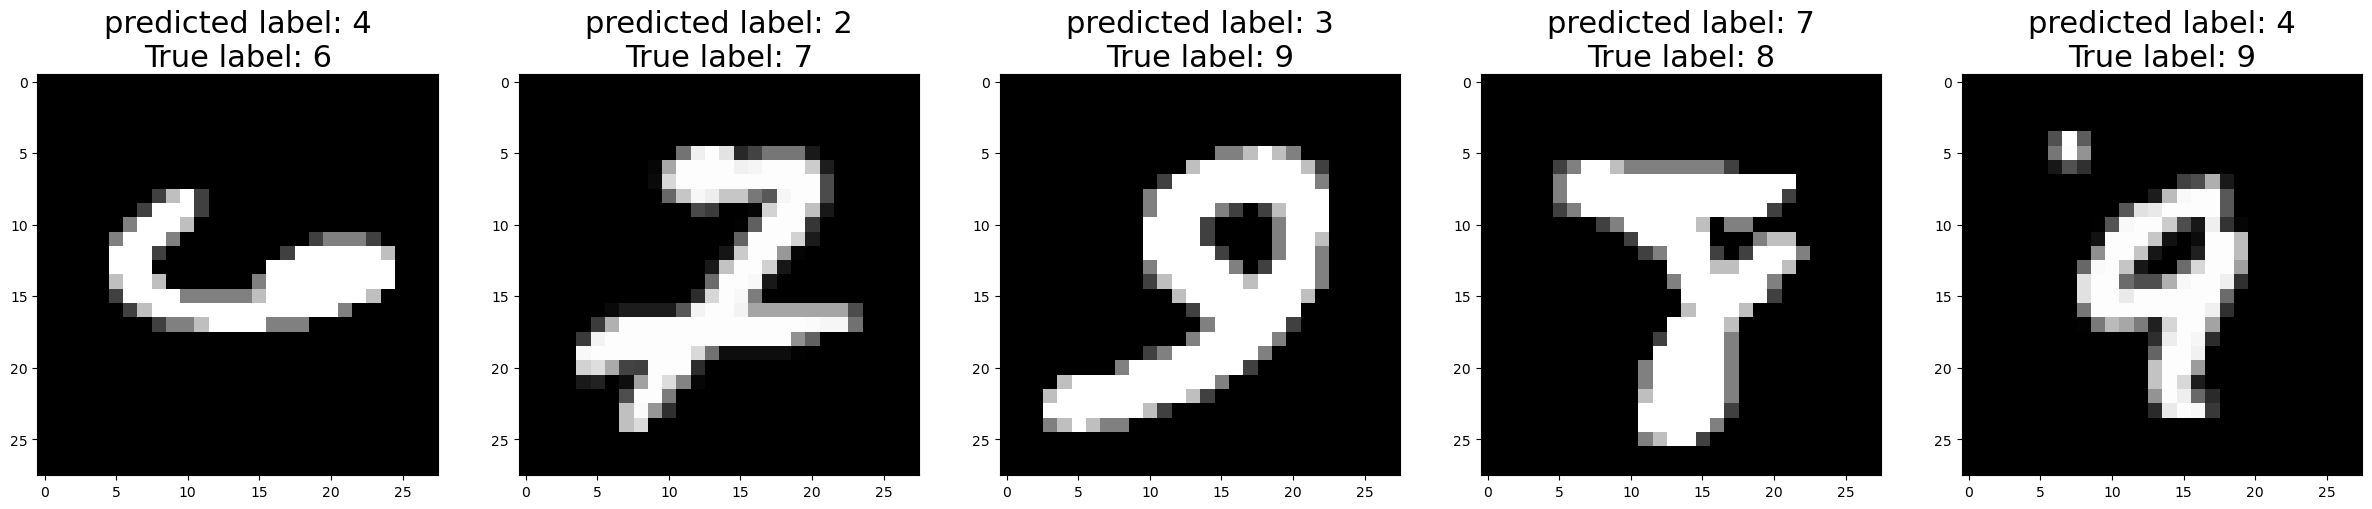

In [20]:
#show top errors
num = len(top_idx_diff_errors)
f,ax = plt.subplots(1,num,figsize = (30,30))

for i in range(0,num):
  idx = top_idx_diff_errors[i]
  sample = X_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample,cmap = 'gray')
  ax[i].set_title("predicted label: {}\nTrue label: {}".format(y_p,y_t),fontsize = 22)